<a href="https://colab.research.google.com/github/IMI1998/Renewable-Energy-Generation/blob/main/Renewable_Energy_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

In [107]:
data = pd.read_csv("/content/Turbine_Data.csv" , parse_dates=['Unnamed: 0'] , index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [110]:
data.nunique()

,0
ActivePower,94084
AmbientTemperatue,93678
BearingShaftTemperature,62286
Blade1PitchAngle,38946
Blade2PitchAngle,39021
Blade3PitchAngle,39021
ControlBoxTemperature,1
GearboxBearingTemperature,62313
GearboxOilTemperature,62412
GeneratorRPM,61074


In [111]:
data.drop(['ControlBoxTemperature' , 'WTG'] , axis=1 , inplace=True)

In [112]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [113]:
data =data[data['ActivePower']>0]

In [114]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,78459.000000,77429.000000,51688.000000,35245.000000,35162.000000,35162.000000,51690.000000,51699.000000,51700.000000,51712.000000,51719.000000,51580.000000,51669.000000,58036.000000,78417.000000,51704.000000,5.204300e+04,58036.000000,78154.000000
mean,747.797398,28.467749,44.044652,1.894208,2.359430,2.359430,67.137834,59.175158,1297.086060,77.033392,76.370209,37.350053,39.247756,197.025643,108.418640,11.635651,2.447029e+03,197.025643,6.522179
std,594.193312,4.111561,4.713164,5.086592,4.988173,4.988173,8.112324,5.056099,314.570244,21.760537,21.832654,4.578066,5.272856,88.597697,118.108782,2.809531,3.942585e+05,88.597697,2.379731
min,0.000012,0.000000,0.000000,-1.960466,-2.406213,-2.406213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,1.970000
25%,230.841137,25.515365,40.643233,-0.981760,-0.474938,-0.474938,61.807016,55.648159,1031.647347,59.919619,59.135475,34.002546,35.519053,148.000000,0.763788,9.251055,2.000000e+00,148.000000,4.709387
50%,561.459072,28.083428,43.903597,-0.233600,0.264962,0.264962,66.621360,58.184056,1237.306035,69.888566,69.153327,37.300636,39.209729,180.666667,64.029546,11.094375,2.000000e+00,180.666667,6.121227
75%,1277.592775,31.250771,47.849347,1.825567,2.271932,2.271932,72.849455,62.567614,1596.193873,92.971386,92.484157,40.982991,42.843750,274.000000,181.919230,14.311696,2.000000e+00,274.000000,7.952195
max,1779.032433,41.809714,55.088655,89.027520,88.915344,88.915344,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,53.768750,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [115]:
data.isna().sum()

,0
ActivePower,0
AmbientTemperatue,1030
BearingShaftTemperature,26771
Blade1PitchAngle,43214
Blade2PitchAngle,43297
Blade3PitchAngle,43297
GearboxBearingTemperature,26769
GearboxOilTemperature,26760
GeneratorRPM,26759
GeneratorWinding1Temperature,26747


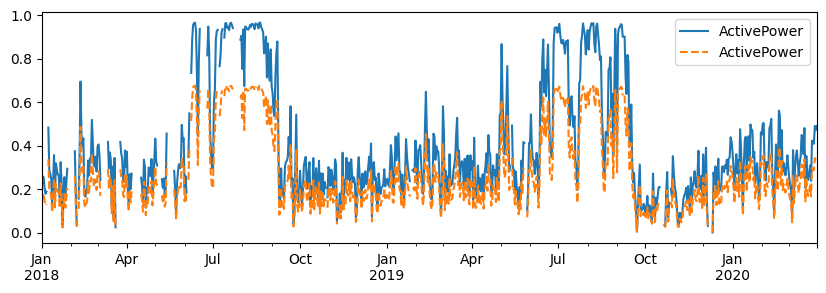

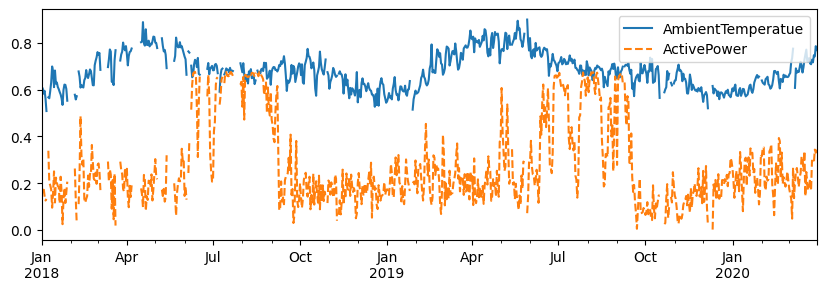

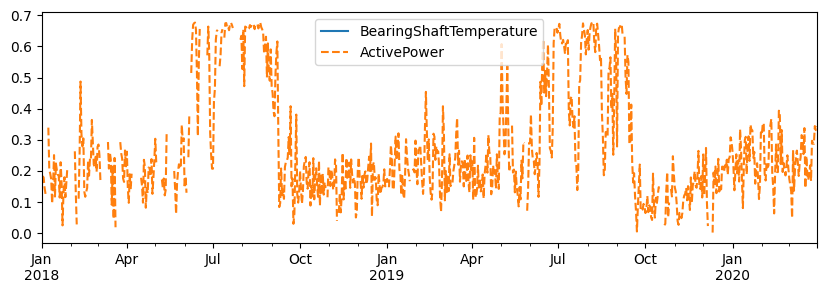

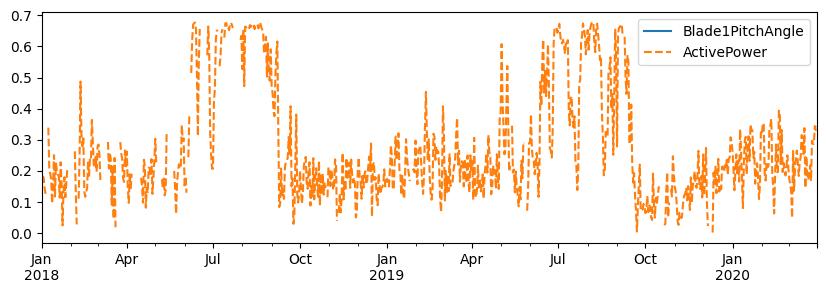

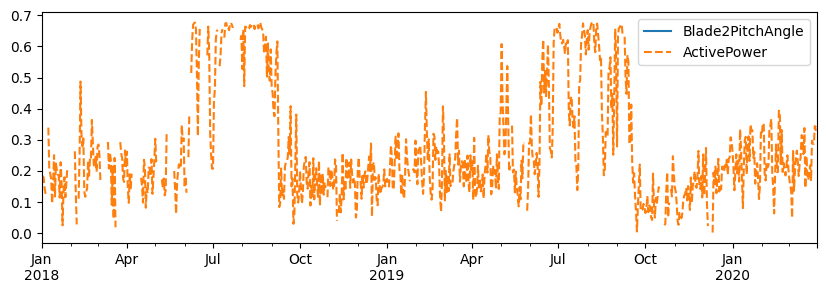

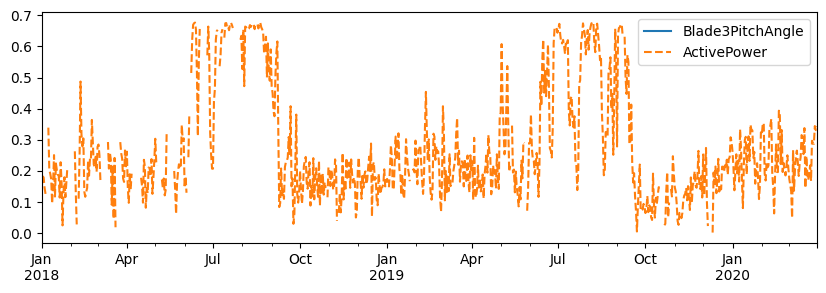

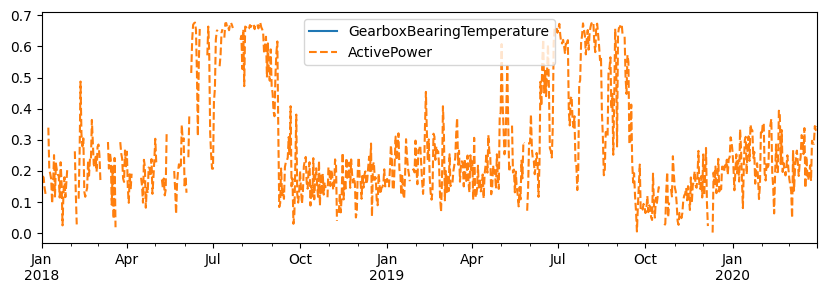

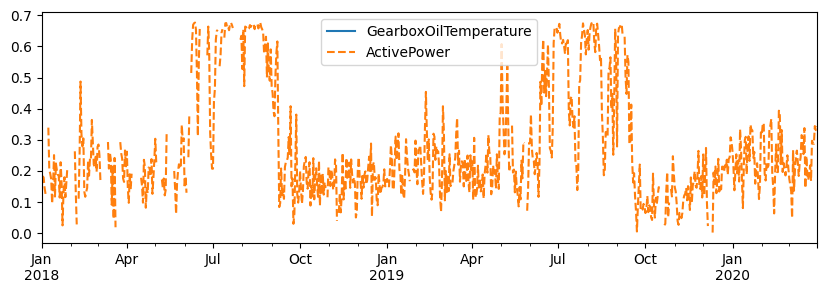

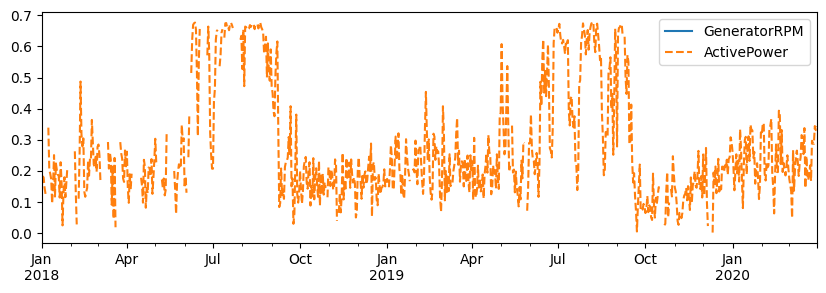

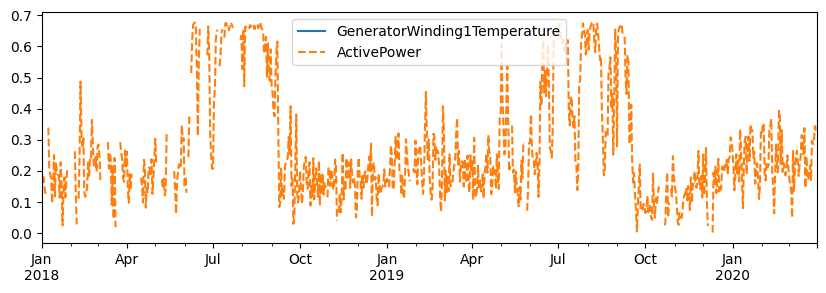

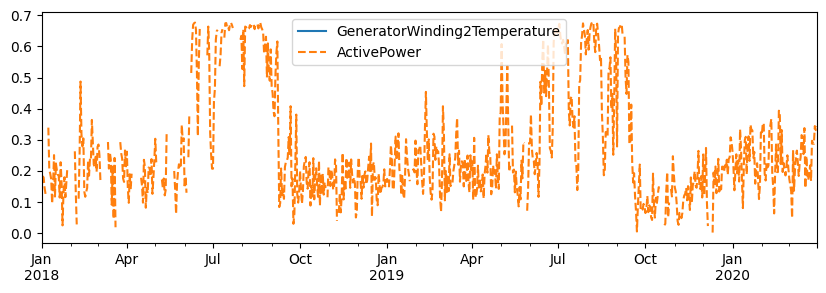

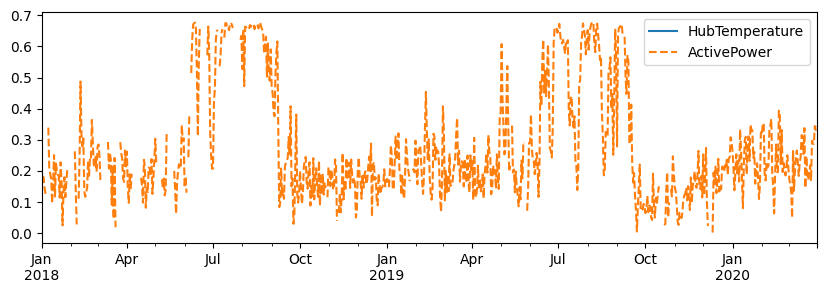

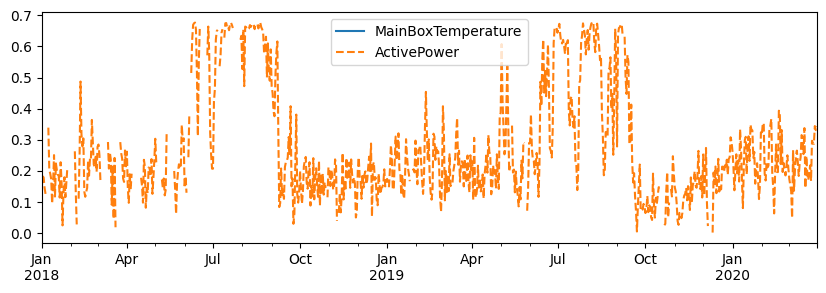

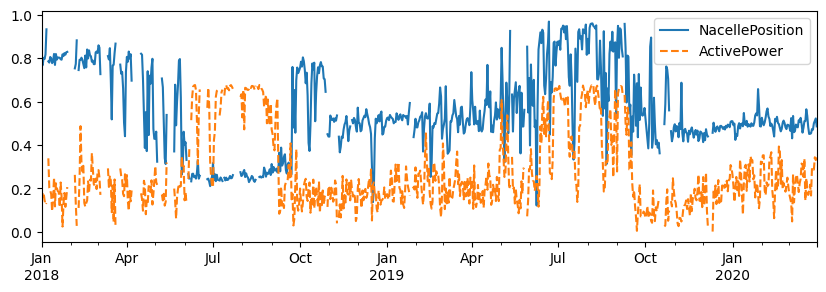

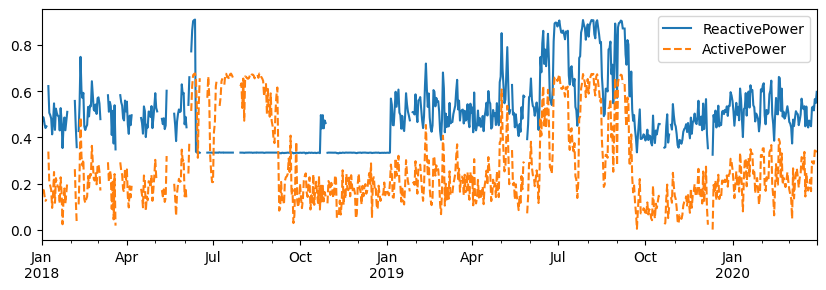

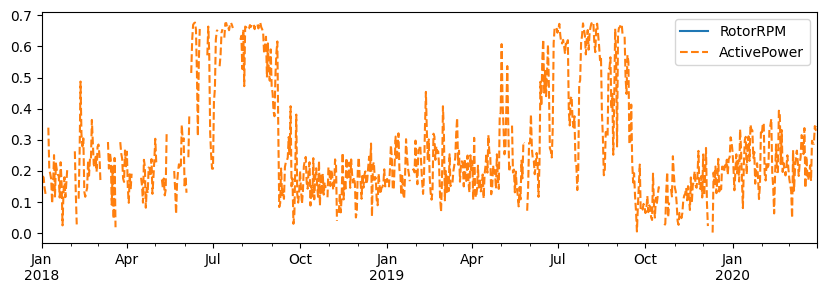

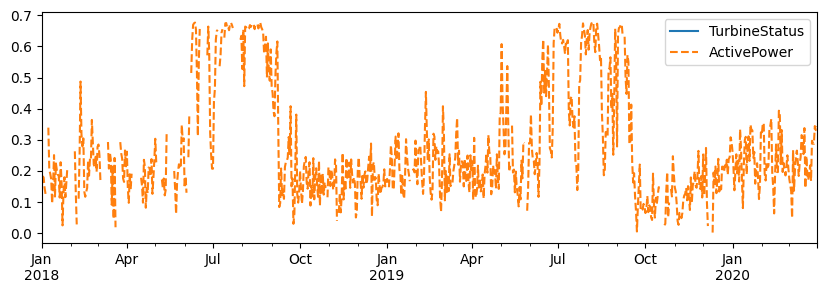

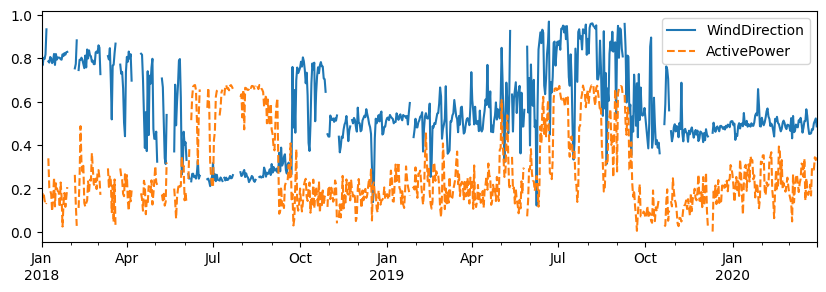

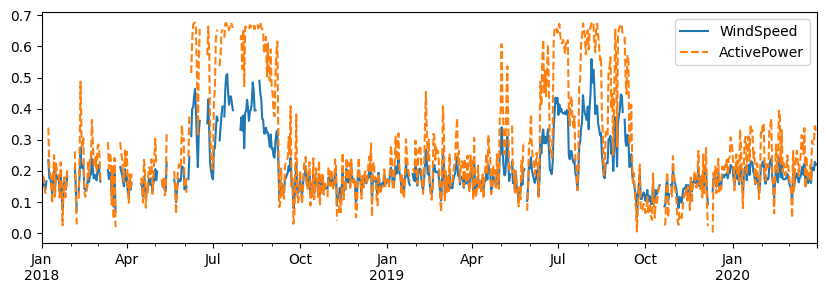

In [116]:
d2 = data.copy()
d2.index = pd.to_datetime(d2.index)
for i in data:
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i] - mini)/(maxi - mini)

    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D' ).mean().plot(style='--' , legend='ActivePower')
    plt.legend()
    plt.show()

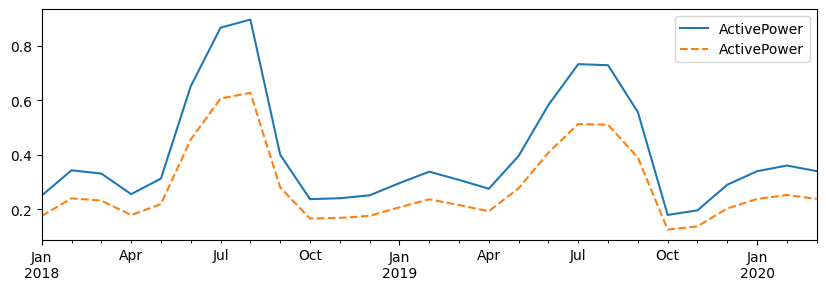

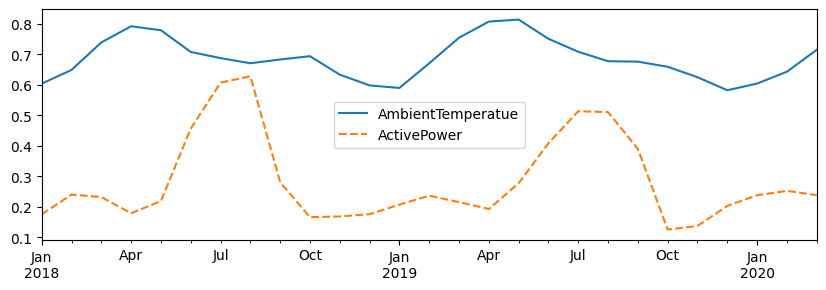

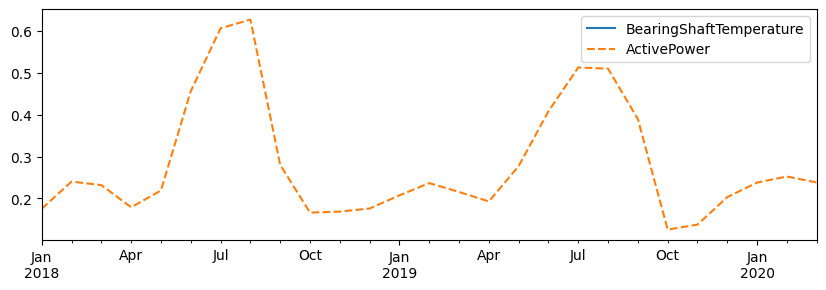

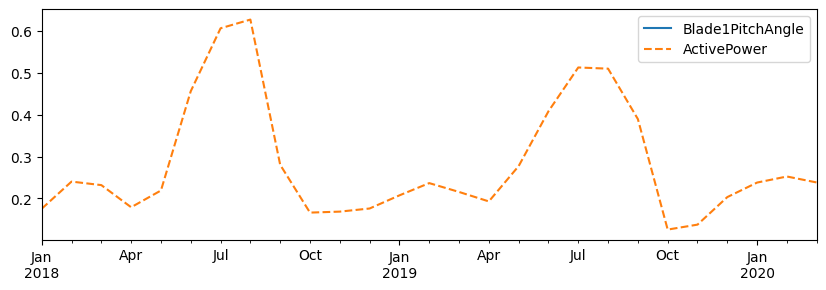

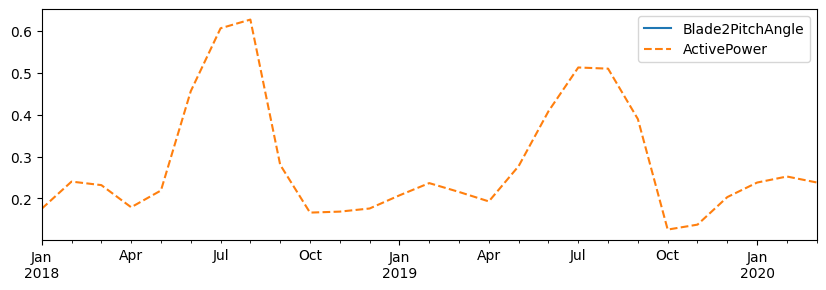

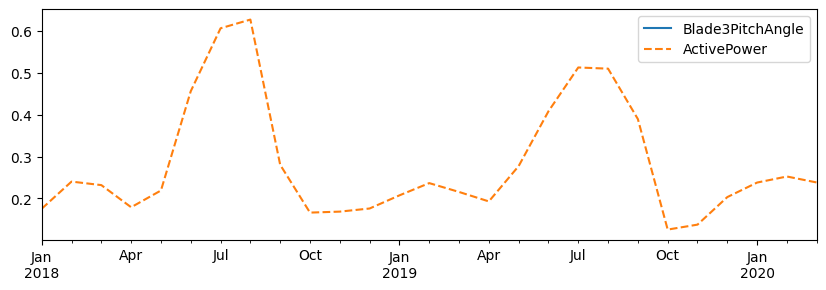

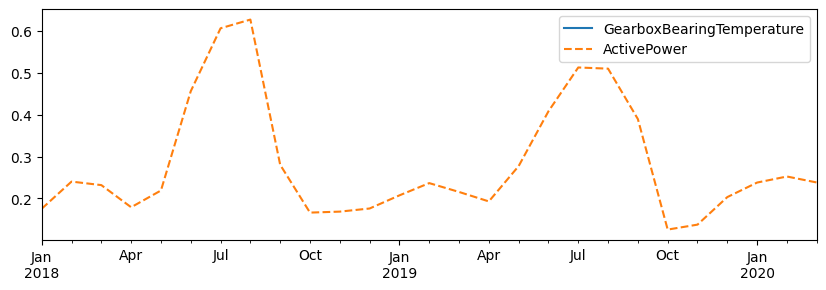

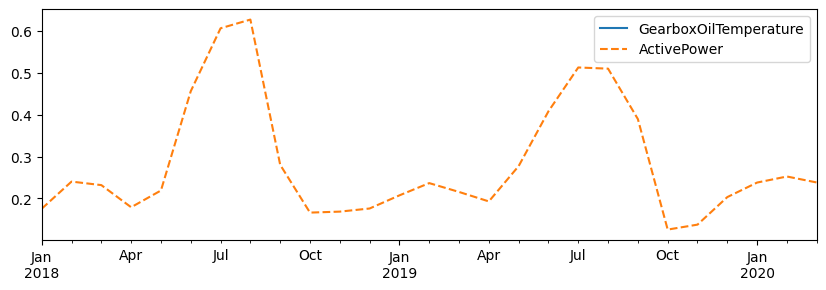

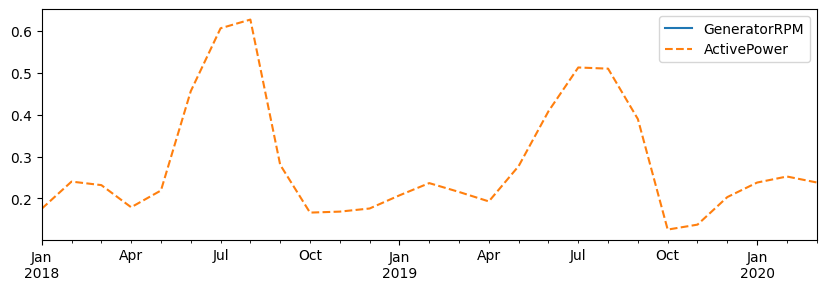

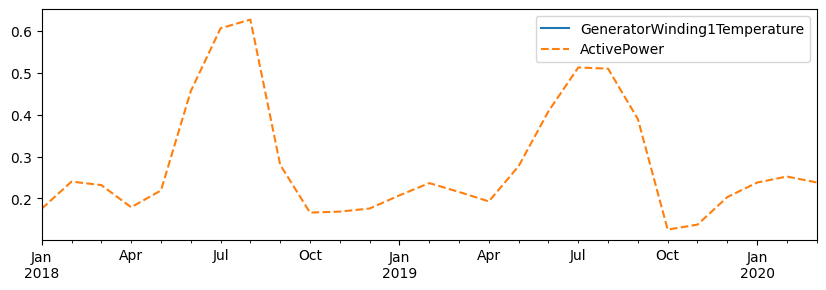

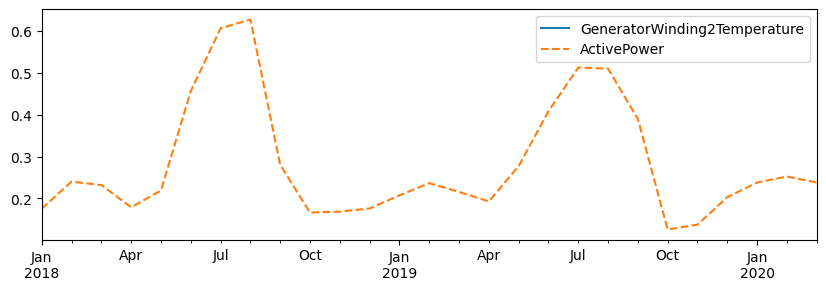

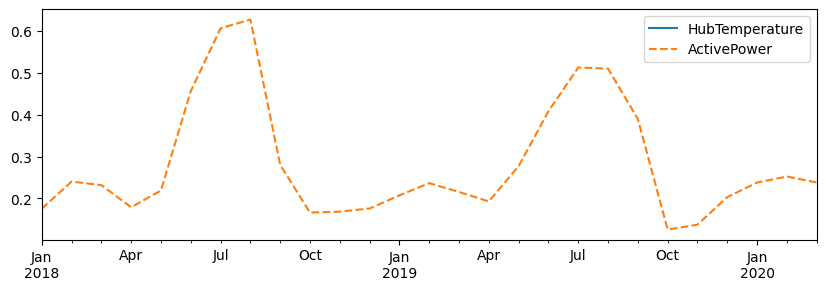

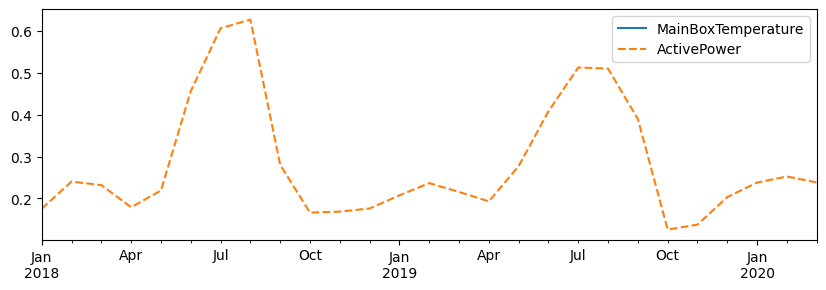

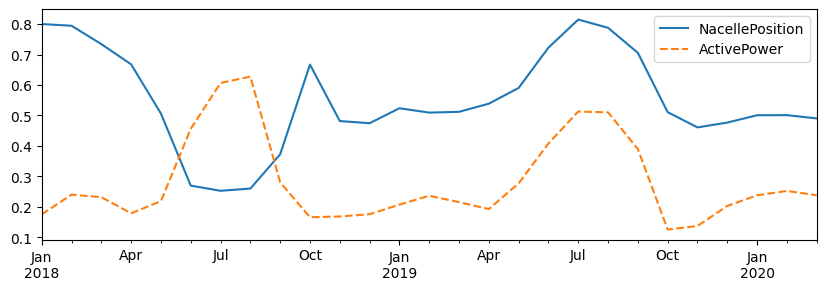

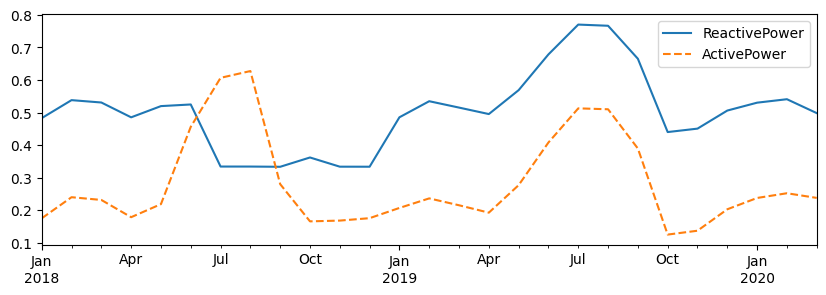

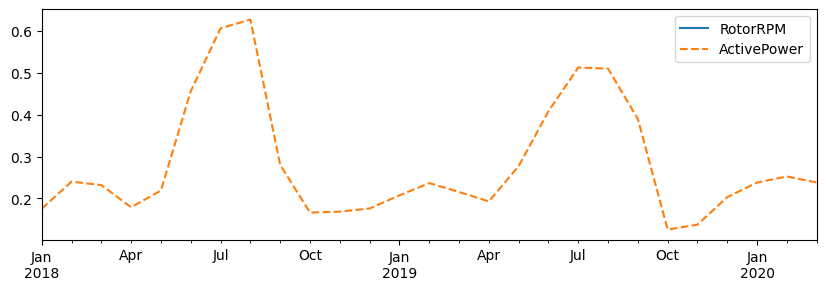

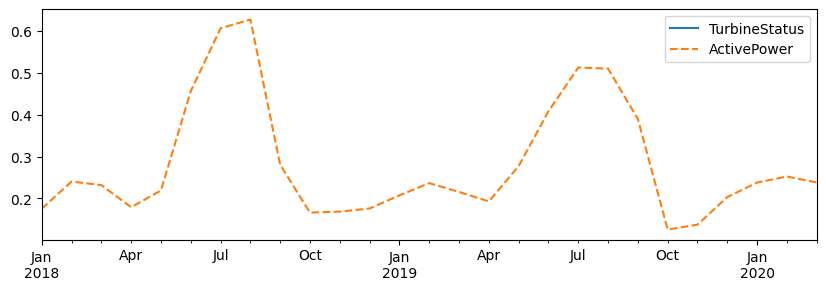

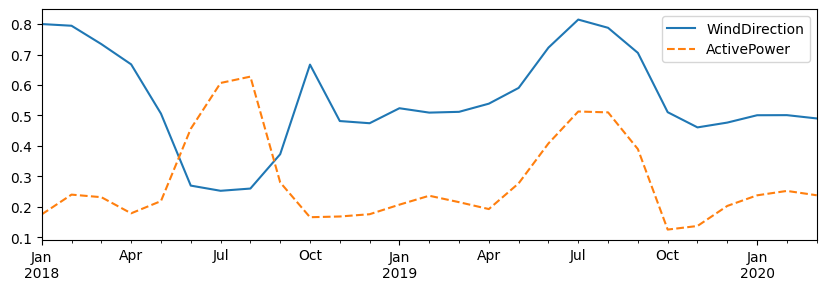

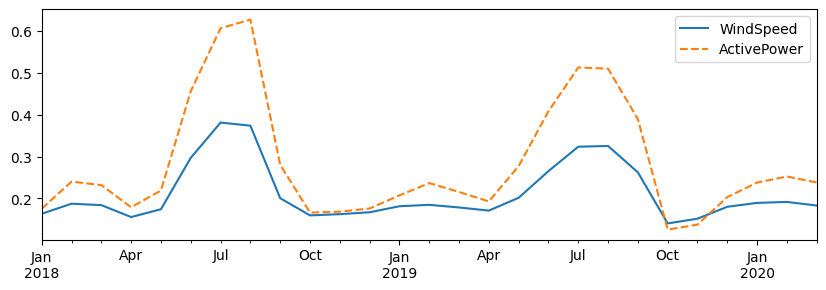

In [117]:
for i in data:

  plt.figure(figsize=(10,3))
  d2[i].resample('M').mean().plot(legend=i)
  (d2['ActivePower']*0.7).resample('M').mean().plot(style='--' , legend='ActivePower')
  plt.legend()
  plt.show()

<Axes: >

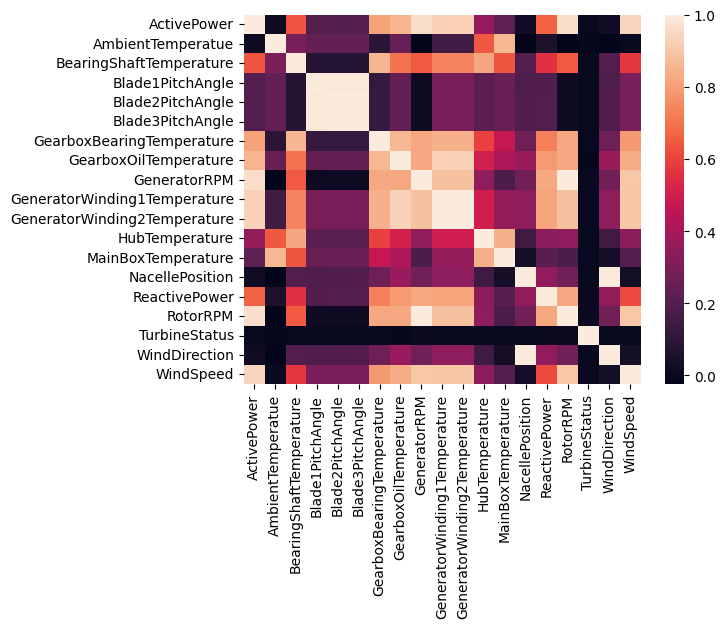

In [118]:
sns.heatmap(data.corr())

In [119]:
 correlations = data.corr().unstack().sort_values(ascending=False)
 correlations['ActivePower'].drop_duplicates()

,0
ActivePower,1.000000
RotorRPM,0.965085
GeneratorRPM,0.963291
WindSpeed,0.939143
GeneratorWinding2Temperature,0.930094
GeneratorWinding1Temperature,0.929041
GearboxOilTemperature,0.854296
GearboxBearingTemperature,0.811462
ReactivePower,0.660449
BearingShaftTemperature,0.633855


In [120]:
data = data[['ActivePower' , 'RotorRPM']]
data.index = pd.to_datetime(data.index)
data.dropna()

,ActivePower,RotorRPM
2018-08-17 14:50:00+00:00,1719.467111,15.708135
2018-08-17 15:00:00+00:00,1717.106883,15.667234
2018-08-17 15:40:00+00:00,1726.039517,15.713484
2018-08-17 15:50:00+00:00,1723.706100,15.713343
2018-08-17 16:00:00+00:00,1722.247344,15.683208
...,...,...
2020-03-30 23:10:00+00:00,70.044465,9.234004
2020-03-30 23:20:00+00:00,40.833474,9.229370
2020-03-30 23:30:00+00:00,20.777790,9.236802
2020-03-30 23:40:00+00:00,62.091039,9.237374


In [121]:
len(data)

78459

In [131]:
x_train , x_test , y_train , y_test = data['RotorRPM'][0:77459], data['RotorRPM'][77459:] ,data['ActivePower'][0:77459], data['ActivePower'][77459:]
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(77459, 1000, 77459, 1000)

In [132]:
from xgboost import XGBRegressor

In [133]:
model = XGBRegressor(n_estimators = 200 ,  early_stopping_rounds=50,
          verbose=True)

In [134]:
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)], )

[0]	validation_0-rmse:487.12422	validation_1-rmse:378.82206
[1]	validation_0-rmse:424.21072	validation_1-rmse:291.43379
[2]	validation_0-rmse:389.66445	validation_1-rmse:237.79861
[3]	validation_0-rmse:371.55061	validation_1-rmse:207.02625
[4]	validation_0-rmse:362.33758	validation_1-rmse:190.55366
[5]	validation_0-rmse:357.73247	validation_1-rmse:182.27001
[6]	validation_0-rmse:355.45267	validation_1-rmse:178.28822
[7]	validation_0-rmse:354.32909	validation_1-rmse:176.46843
[8]	validation_0-rmse:353.77613	validation_1-rmse:175.68056
[9]	validation_0-rmse:353.50464	validation_1-rmse:175.37475
[10]	validation_0-rmse:353.37137	validation_1-rmse:175.28179
[11]	validation_0-rmse:353.30564	validation_1-rmse:175.27339
[12]	validation_0-rmse:353.27325	validation_1-rmse:175.29936
[13]	validation_0-rmse:353.25706	validation_1-rmse:175.32746
[14]	validation_0-rmse:353.24898	validation_1-rmse:175.35439
[15]	validation_0-rmse:353.24500	validation_1-rmse:175.37891
[16]	validation_0-rmse:353.24278	v

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[17]	validation_0-rmse:353.24163	validation_1-rmse:175.40444
[18]	validation_0-rmse:353.24086	validation_1-rmse:175.41667
[19]	validation_0-rmse:353.24058	validation_1-rmse:175.42475
[20]	validation_0-rmse:353.24031	validation_1-rmse:175.42949
[21]	validation_0-rmse:353.24012	validation_1-rmse:175.42922
[22]	validation_0-rmse:353.23992	validation_1-rmse:175.43269
[23]	validation_0-rmse:353.23978	validation_1-rmse:175.43428
[24]	validation_0-rmse:353.23976	validation_1-rmse:175.43588
[25]	validation_0-rmse:353.23966	validation_1-rmse:175.43925
[26]	validation_0-rmse:353.23960	validation_1-rmse:175.43862
[27]	validation_0-rmse:353.23959	validation_1-rmse:175.43921
[28]	validation_0-rmse:353.23954	validation_1-rmse:175.44091
[29]	validation_0-rmse:353.23950	validation_1-rmse:175.44163
[30]	validation_0-rmse:353.23947	validation_1-rmse:175.44047
[31]	validation_0-rmse:353.23945	validation_1-rmse:175.44123
[32]	validation_0-rmse:353.23943	validation_1-rmse:175.44092
[33]	validation_0-rmse:3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
pred = model.predict(x_test)

In [136]:
df_final = pd.DataFrame(data={'Actuals':y_test , 'Predictions':pred})
df_final.index = pd.to_datetime(df_final.index)
df_final.head()

,Actuals,Predictions
2020-03-23 03:10:00+00:00,520.748101,531.708313
2020-03-23 03:20:00+00:00,359.700199,340.978668
2020-03-23 03:30:00+00:00,236.246917,269.957062
2020-03-23 03:40:00+00:00,174.975413,116.215622
2020-03-23 03:50:00+00:00,243.707039,242.960144


In [137]:
from sklearn.metrics import *

In [138]:
print('(R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'] , df_final['Predictions'])))
print('(MAE) = {:.2f}'.format(mean_absolute_error(df_final['Actuals'] , df_final['Predictions'])))
print('(RMSE) = {:.2f}'.format(mean_squared_error(df_final['Actuals'] , df_final['Predictions'])))
print('(MAPE) = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'] , df_final['Predictions'])))

(R-squared) = 0.883
(MAE) = 77.44
(RMSE) = 30720.76
(MAPE) = 1.582


<Axes: ylabel='ActivePower'>

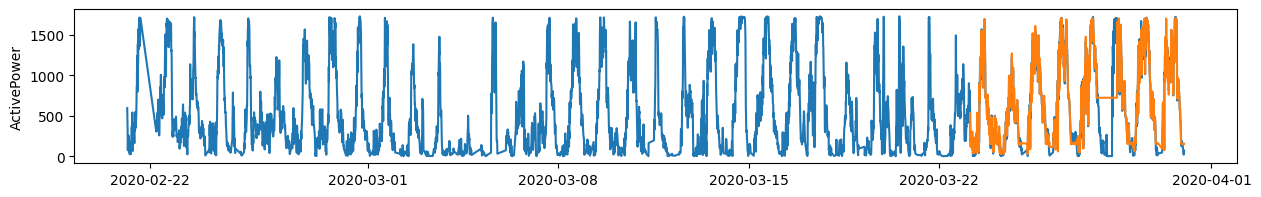

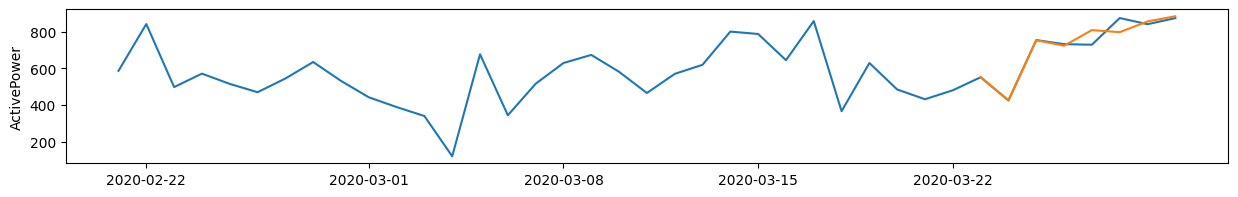

In [139]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())
